In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet18_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.295, ECE: 0.041
Optimal temperature: 4.904
After temperature - NLL: 0.863, ECE: 0.462


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


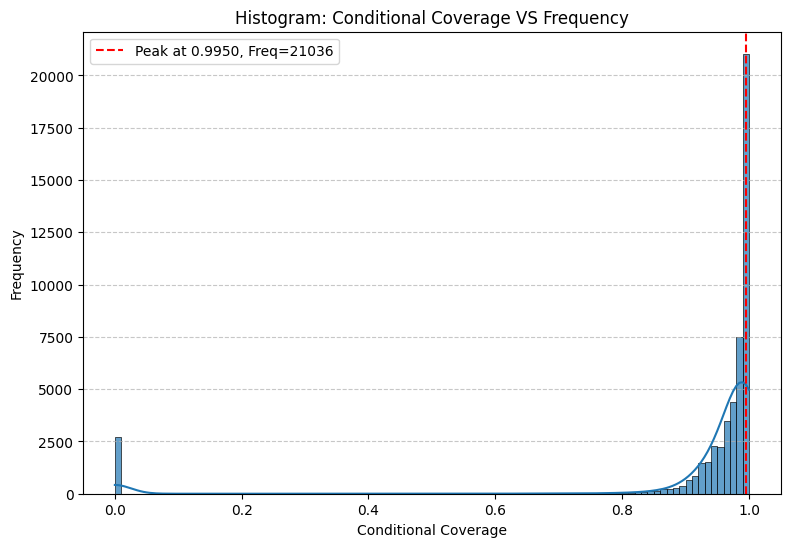

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9245 ± 0.0037
Final Average Prediction Set Size: 1.06 ± 0.01
Final Average Coverage: 0.9449 ± 0.0053
Final Average Real Probability: 0.9197 ± 0.0054


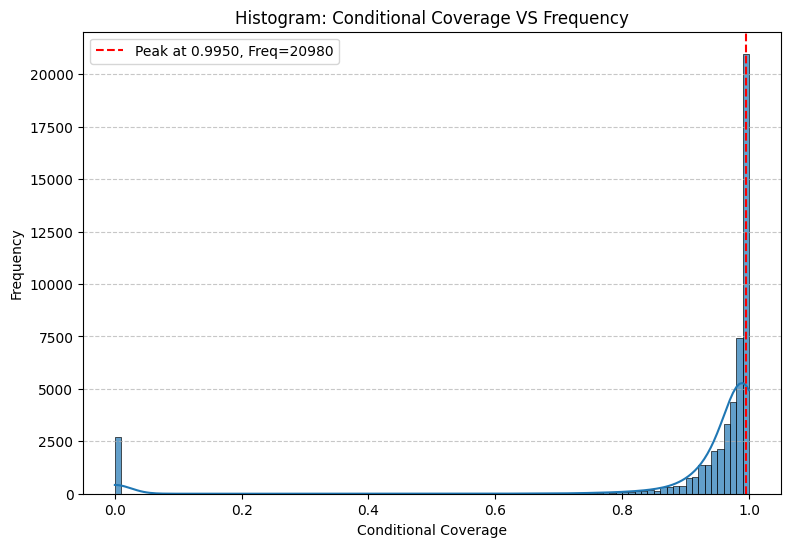

20980 (41.96%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9336 ± 0.0027
Final Average Prediction Set Size: 0.97 ± 0.00
Final Average Coverage: 0.9502 ± 0.0027
Final Average Real Probability: 0.9140 ± 0.0025


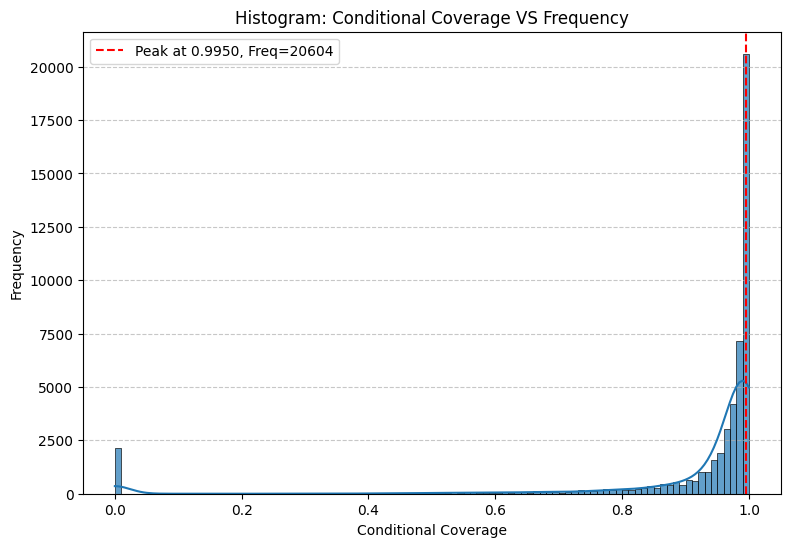

20604 (41.21%) samples reached the peak conditional coverage at 0.9950


In [6]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 8.08 ± 0.09
Final Average Coverage: 0.9999 ± 0.0001
Final Average Real Probability: 0.9981 ± 0.0001


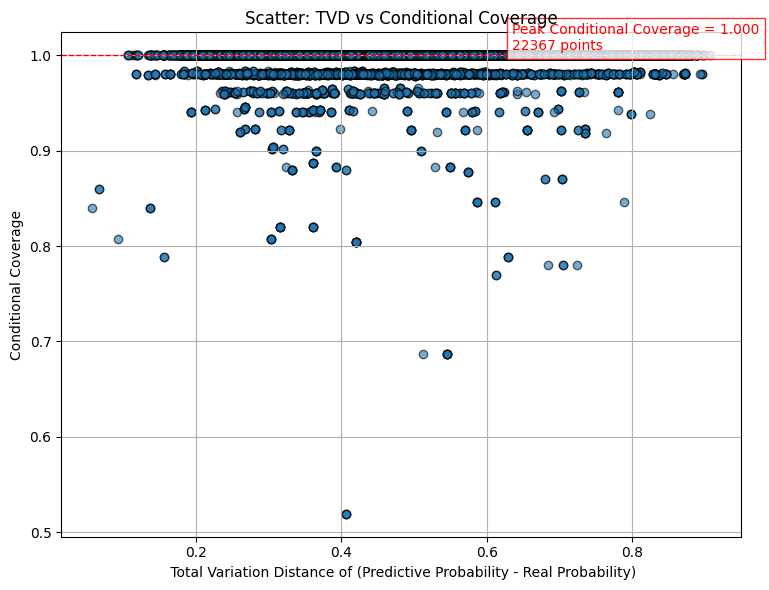

In [7]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9245 ± 0.0037
Final Average Prediction Set Size: 3.75 ± 0.03
Final Average Coverage: 0.9952 ± 0.0008
Final Average Real Probability: 0.9821 ± 0.0007


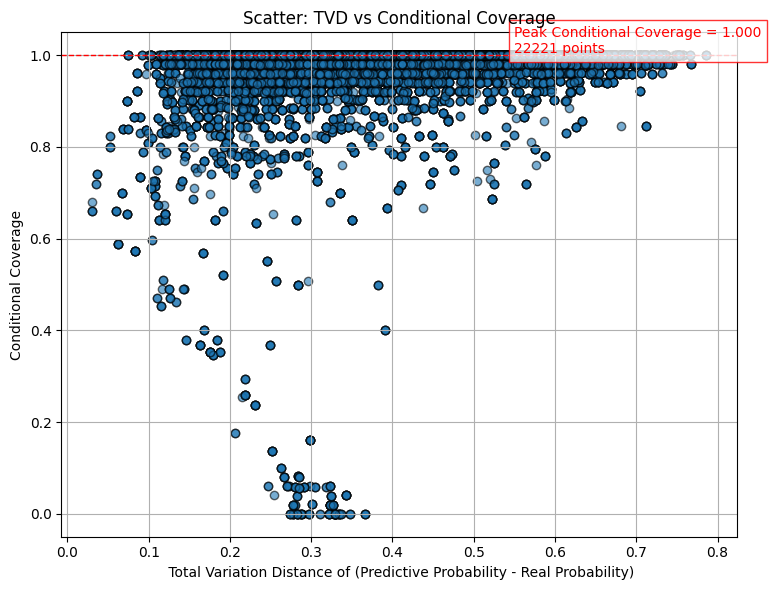

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9336 ± 0.0027
Final Average Prediction Set Size: 1.20 ± 0.00
Final Average Coverage: 0.9466 ± 0.0020
Final Average Real Probability: 0.9158 ± 0.0028


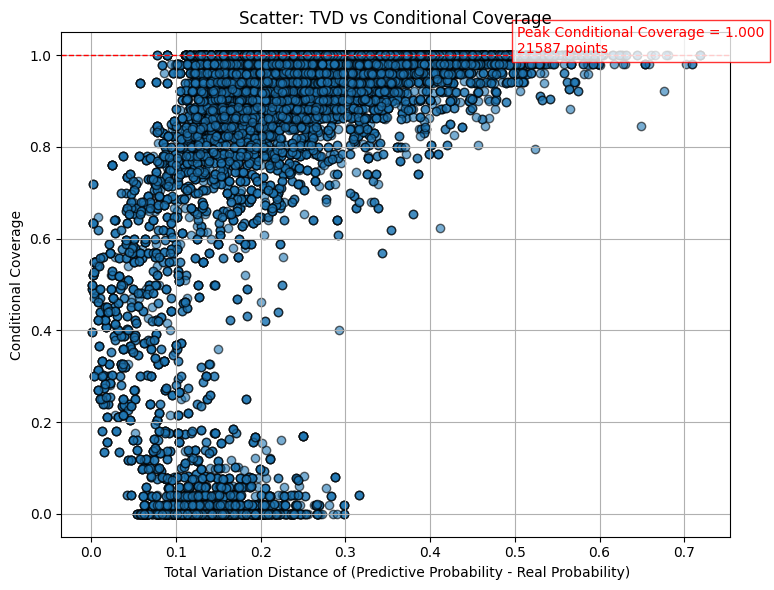

In [10]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)